<a href="https://colab.research.google.com/github/sayalidudhane/machinelearning/blob/main/InternProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("/content/train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

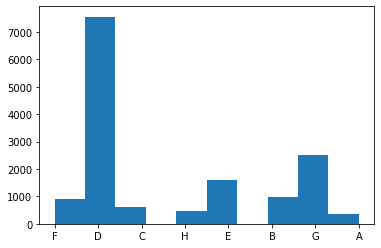

In [ ]:
plt.hist(data_train["category"])
plt.show()

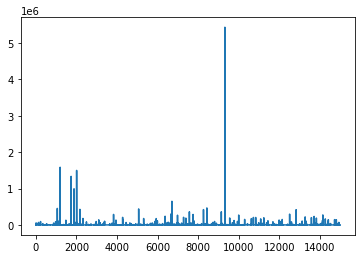

In [ ]:
plt.plot(data_train["adview"])
plt.show()

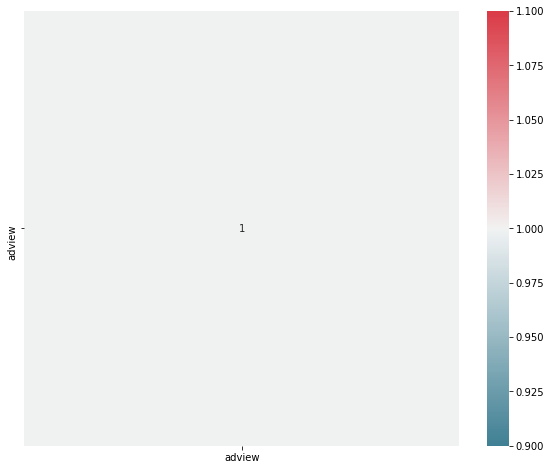

In [ ]:
#Heatmap 
import seaborn as sns  
f, ax = plt.subplots(figsize=(10, 8)) 
corr = data_train.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),  square=True, ax=ax,annot=True) 
plt.show()

In [ ]:
data_train=data_train[data_train.views!='F'] 
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F'] 
data_train=data_train[data_train.comment!='F']
 
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
# Assigning each category a number for Category feature 
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8} 
data_train["category"]=data_train["category"].map(category) 
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
 # Convert values to integers for views, likes, comments, dislikes and adview 
data_train["views"] = pd.to_numeric(data_train["views"]) 
data_train["comment"] = pd.to_numeric(data_train["comment"]) 
data_train["likes"] = pd.to_numeric(data_train["likes"]) 
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"]) 
data_train["adview"]=pd.to_numeric(data_train["adview"])  
 
column_vidid=data_train['vidid']

In [ ]:
# Endoding features like Category, Duration, Vidid 
from sklearn.preprocessing import LabelEncoder 
data_train['duration']=LabelEncoder().fit_transform(data_train['duration']) 
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid']) 
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
 
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# Convert Time_in_sec for duration 
import datetime 
import time

In [ ]:
def checki(x): 
 y = x[2:]  
 h = '' 
 m = ''  
 s = '' 
 mm = '' 
 P = ['H','M','S']  
 for i in y: 
   if i not in P: 
    mm+=i  
   else: 
     if(i=="H"): 
      h = mm  
      mm = ''  
     elif(i == "M"): 
      m = mm 
      mm = '' 
     else: 
      s = mm 
      mm = ''  
    
 
 if(h==''): 
  h = '00' 
 if(m == ''): 
  m = '00'  
 if(s==''): 
  s='00'  
 bp = h+':'+m+':'+s  
 return bp 
 
 
mp = pd.read_csv("/content/train.csv")["duration"] 
time = mp.apply(checki) 
 
def func_sec(time_string): 
   h, m, s = time_string.split(':')  
   return int(h) * 3600 + int(m) * 60 + int(s)  
 
 
time1=time.apply(func_sec) 
 
data_train["duration"]=time1 
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [ ]:
# Split Data 
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target']) 
data_train=data_train.drop(["adview"],axis=1) 
data_train=data_train.drop(["vidid"],axis=1) 
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)  
 
X_train.shape

(11709, 7)

In [ ]:
# Normalise Data 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.fit_transform(X_test) 
 
X_train.mean()

0.17395410595763316

In [ ]:
# Evaluation Metrics 
from sklearn import metrics 
def print_error(X_test, y_test, model_name): 
 prediction = model_name.predict(X_test) 
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction)) 
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction)) 
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression 
from sklearn import linear_model 
linear_regression = linear_model.LinearRegression() 
linear_regression.fit(X_train, y_train) 
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 5288.059212091739
Mean Squared Error: 10881114821.641329
Root Mean Squared Error: 104312.58227865577


In [ ]:
# Support Vector Regressor 
from sklearn.svm import SVR 
supportvector_regressor = SVR() 
supportvector_regressor.fit(X_train,y_train) 
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 5288.059212091739
Mean Squared Error: 10881114821.641329
Root Mean Squared Error: 104312.58227865577


In [ ]:
# Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor 
decision_tree = DecisionTreeRegressor() 
decision_tree.fit(X_train, y_train) 
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 5570.351092896175
Mean Squared Error: 12367125597.844946
Root Mean Squared Error: 111207.57886873065


In [ ]:
# Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor 
n_estimators = 200 
max_depth = 25 
min_samples_split=15 
min_samples_leaf=2 
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split) 
random_forest.fit(X_train,y_train) 
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 5205.235054445989
Mean Squared Error: 10451244729.840675
Root Mean Squared Error: 102231.32949267888


In [51]:
# Artificial Neural Network 
import keras 
from keras.layers import Dense  
 
ann = keras.models.Sequential([  Dense(6, activation="relu",  input_shape=X_train.shape[1:]),  Dense(6,activation="relu"),  Dense(1)  ])  
 
optimizer=keras.optimizers.Adam() 
loss=keras.losses.mean_squared_error 
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
 
history=ann.fit(X_train,y_train,epochs=100)  
ann.summary()  
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 947us/step - loss: 767618368.0000 - mean_squared_error: 767618368.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 767610944.0000 - mean_squared_error: 767610944.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767598848.0000 - mean_squared_error: 767598848.0000
Epoch 4/100
366/366 [==============================] - 0s 949us/step - loss: 767581696.0000 - mean_squared_error: 767581696.0000
Epoch 5/100
366/366 [==============================] - 0s 896us/step - loss: 767558784.0000 - mean_squared_error: 767558784.0000
Epoch 6/100
366/366 [==============================] - 0s 892us/step - loss: 767530752.0000 - mean_squared_error: 767530752.0000
Epoch 7/100
366/366 [==============================] - 0s 912us/step - loss: 767494144.0000 - mean_squared_error: 767494144.0000
Epoch 8/100
366/366 [==============================] - 0s 873us/step - loss: 767448832.0000 - mean_sq

In [54]:
#Saving Scikitlearn models 
import joblib 
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")  
# Saving Keras Artificial Neural Network model 
ann.save("ann_youtubeadview.h5")